# Unit 5 - Financial Planning

In [264]:
# Initial imports                                   #importing packages and libraries. 
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [265]:
# Load .env enviroment variables
load_dotenv()                               #gets the  proper .env for me

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [266]:
# Set current amount of crypto assets           #Taken from the READme instructions.
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [267]:
# Crypto API URLs                                                       #urls to be used, thank you.
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [268]:
# Fetch current BTC price
    # YOUR CODE HERE!
btc_data = requests.get(btc_url).json()     #sends get request for the bitcoin data
#print(json.dumps(btc_data, indent=4))       #I had a look at the json data so that I would know its structure and be able to call the value of the price key.

cur_btc_prc = btc_data['data']['1']['quotes']['USD']['price']       #assigns the price value to cur_btc_prc. Note: Here I do not feel like I was given enough instruction to know how to pull the price out of the json object without using the full address. The structure of json and how to pull out information efficiently was not covered well at all.

# Fetch current ETH price
# YOUR CODE HERE!
eth_data = requests.get(eth_url).json()         #get request for the etherium data
#print(json.dumps(eth_data, indent=4))          #I had a look at the json data that I would know its structure and be able to call the value of the price key.

cur_eth_prc = eth_data['data']['1027']['quotes']['USD']['price']        #assigns the price value to cur_eth_prc

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * cur_btc_prc                                     #calculates customer's current bitcoin value
my_eth_value = my_eth * cur_eth_prc                                     #calculates customer's current ehterium value
my_crypto = my_btc_value + my_eth_value                                 #calculates customer's total cryptocurrency value

# Print current crypto wallet balance
print(f"The current valuy of your cyrptocurrency is\t$ {my_crypto:0.2f}\n\
The current value of your {my_btc} BTC is\t\t$ {my_btc_value:0.2f}\n\
The current value of your {my_eth} ETH is\t\t$ {my_eth_value:0.2f}")        #prints a neat little statment about the customer's crypto wallet balances.

The current valuy of your cyrptocurrency is	$ 64919.40
The current value of your 1.2 BTC is		$ 48907.20
The current value of your 5.3 ETH is		$ 16012.20


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [269]:
# Set current amount of shares          Already done for me, thanks.
my_agg = 200
my_spy = 50

In [270]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")                        #gets the api key from .env
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")                  #gets the secret key from .env

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

In [271]:
# Format current date as ISO format         I don't have any special comments here. The code does what is already commented.
# YOUR CODE HERE!
today = pd.Timestamp("2022-04-08", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
portfolio_df = alpaca.get_bars(tickers, timeframe, start= today, end= today).df
portfolio_df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = portfolio_df[portfolio_df['symbol']== 'AGG'].drop('symbol', axis=1)
SPY = portfolio_df[portfolio_df['symbol']== 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
portfolio_df = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])
portfolio_df.index =portfolio_df.index.date
# Preview DataFrame
# YOUR CODE HERE!
portfolio_df.head()

AGG                                                            \
              open    high      low   close   volume trade_count        vwap   
2022-04-08  104.82  105.01  104.615  104.73  6501822       24900  104.804999   

               SPY                                                            
              open    high     low   close    volume trade_count        vwap  
2022-04-08  448.04  450.63  445.94  447.57  79148376      573491  448.250805

In [300]:
tickers[0]

'AGG'

In [272]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(portfolio_df["AGG"]["close"])
spy_close_price = float(portfolio_df["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $104.73
Current SPY closing price: $447.57


In [273]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22378.50
The current value of your 200 AGG shares is $20946.00


### Savings Health Analysis

In [274]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
my_crypto_value = my_btc_value + my_agg_value
my_shares_value = my_agg_value + my_spy_value

assets = ["crypto", "shares"]
amount = { "amount": [my_crypto_value, my_shares_value]}

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(amount, index=assets)

# Display savings DataFrame
display(df_savings)

,amount
crypto,69853.2
shares,43324.5


<AxesSubplot:title={'center':'Stocks Portfolio Composition'}, ylabel='amount'>

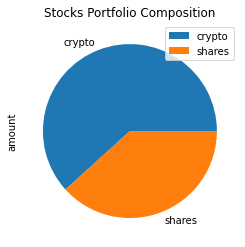

In [275]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Stocks Portfolio Composition")

In [276]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = float(df_savings["amount"].sum())

# Validate saving health
# YOUR CODE HERE!
#wrote this function:
def fin_health(savings):
    if total_savings > emergency_fund:
        message = "Congratulations for having enough money in this fund!"
    elif total_savings == emergency_fund:
        message = "Congratulations on reaching this financial goal!"
    else:
        message = f"You are only $ {emergency_fund - total_savings} away from reaching your financial goal!"
    return message

fin_health(total_savings)

'Congratulations for having enough money in this fund!'

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [277]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [278]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_bars(tickers, timeframe, start= start_date, end= end_date).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_stock_data[df_stock_data["symbol"]== "AGG"].drop("symbol", axis=1)
SPY = df_stock_data[df_stock_data["symbol"]== "SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])
# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [279]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty = MCSimulation(portfolio_data= df_stock_data,  weights=[0.4, 0.6], num_simulation=500, num_trading_days=252*30)           #Note that I have the weights correct, my dataframe set up as AGG, SPY so the way I have it is 60% SPY and 40% AGG as in the instructions

In [280]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirty.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [281]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/richardmelvin/UofM-VIRT-FIN-PT-03-2022-U-LOL-1/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005520,0.995460,1.010406,0.996340,1.001889,0.991975,0.998464,1.001547,0.987800,1.007861,...,0.997603,1.006633,0.997907,0.986442,1.006526,1.003664,1.002365,1.006133,0.997368,1.005100
2,0.996828,0.994497,1.000885,0.994487,0.997897,1.003631,1.005103,0.999939,0.976456,1.014032,...,1.003095,1.011555,1.006698,0.988642,1.006359,0.998224,1.015670,1.010013,0.996861,1.000703
3,1.009578,0.995804,1.013851,1.001853,0.993661,0.997427,0.995306,1.004702,0.980239,1.022238,...,1.004702,0.998350,1.007902,0.986893,1.023804,0.993625,1.027846,1.004318,0.998392,0.999823
4,1.011600,0.989724,1.021070,1.011195,0.977588,0.991097,0.999920,1.015328,0.981930,1.031433,...,0.998697,0.999379,1.013080,1.008126,1.024457,0.985477,1.021686,0.997945,0.997390,1.005602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.716646,8.192607,8.259844,20.297420,18.789340,6.314928,11.604467,35.667423,27.027549,19.161174,...,14.647402,11.032469,21.472355,20.395561,25.522158,22.373105,4.984548,34.310759,36.876783,15.673820
7557,2.687198,8.208922,8.289052,20.283658,18.775779,6.368236,11.713340,35.486676,27.194611,19.051382,...,14.820708,11.081057,21.420003,20.399139,25.407381,22.463176,4.954986,33.973724,37.264004,15.749347
7558,2.725243,8.153859,8.371568,20.316670,18.349546,6.450186,11.887824,35.315468,27.302983,19.203657,...,14.767799,11.151793,21.523868,20.218396,24.923823,22.555648,4.945200,34.157515,37.111036,15.856249
7559,2.744708,8.247868,8.342779,20.155004,18.190656,6.455097,11.761053,35.336467,27.240145,19.080481,...,14.906474,11.192502,21.350259,20.230757,24.804482,22.545331,4.945814,33.753412,36.670056,15.814971


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

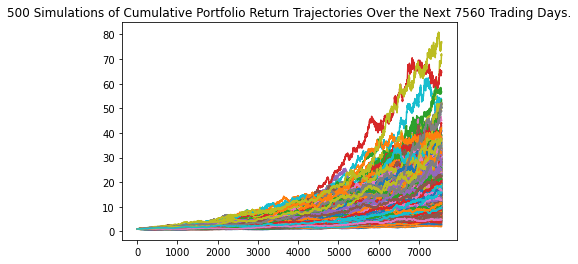

In [282]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_thirty.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

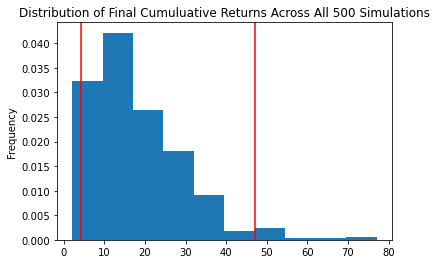

In [283]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_thirty.plot_distribution()

### Retirement Analysis

In [284]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
sum_stats = MC_thirty.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(sum_stats)

count           500.000000
mean             18.081573
std              11.117170
min               2.050333
25%               9.741431
50%              15.876896
75%              23.868574
max              77.032012
95% CI Lower      4.210671
95% CI Upper     47.024487
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [285]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(sum_stats[8] * 20000, 2)
ci_upper = round(sum_stats[9] * 20000, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $84213.42 and $940489.75


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [286]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(sum_stats[8] * initial_investment, 2)
ci_upper = round(sum_stats[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $126320.14 and $1410734.62


# Optional Challenge
### I went through line by line of the starter file to do the required homework.
### Much of the optional problem, as well as the Retirement Planning section of the required homework, was repetitive so I wrote some functions. The functions are presented in the additional Jupyter Notebook file ("Financial-planner-functions.ipynb") located in my GitHub repository.
### I made a separate notebook so that I could make some changes to reduce cluttery output (I modified the MCForecastTools.py file so that it does not print out the rounds of MCMC iteration) and avoid variable naming confusion.
### So I hope that you don't mind looking at the Optional Challenge in a different file.